**This report is prepared by Gizem Güneş and Mehmet Cenk Bursalı**

# Q1 

In [114]:
from  gurobipy import GRB, Model
import pandas as pd
import numpy as np

m = Model("churn")

churn=pd.read_excel("Churn.xlsx")


churn["expected_revenue"]= churn["lifetime_value"] * churn["churn_probability"] * churn["response_probability"]
churn




,CustomerID,lifetime_value,churn_probability,response_probability,discount_amount,points_amount,revenue,expected_revenue
0,1,517,0.69,0.01,40,15,3.5673,3.5673
1,2,853,0.70,0.45,10,30,268.6950,268.6950
2,3,778,0.10,0.22,30,30,17.1160,17.1160
3,4,916,0.79,0.79,35,15,571.6756,571.6756
4,5,850,0.93,0.39,40,50,308.2950,308.2950
...,...,...,...,...,...,...,...,...
95,96,56,0.23,0.82,25,10,10.5616,10.5616
96,97,354,0.41,0.85,45,35,123.3690,123.3690
97,98,396,0.81,0.15,50,5,48.1140,48.1140
98,99,202,0.72,0.39,20,50,56.7216,56.7216


In [115]:
expected_revenue=churn["expected_revenue"]
discount_amount=churn["discount_amount"]
points_amount=churn["points_amount"]


In [116]:
customers=range(100)

#decision variables

x=m.addVars(customers, obj= expected_revenue, name='x')

In [117]:
#constraints

m.addConstr(sum( x[i]* discount_amount[i] for i in customers) <= 800, 'budget_discount')
m.addConstrs(x[i] *discount_amount[i] <= discount_amount[i] for i in customers)

#m.write('file.lp')
              

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [118]:
#solution

# Set objective
m.modelSense = GRB.MAXIMIZE

# Solve
m.optimize()

for v in m.getVars():
    if v.x != 0:
        print("Customer with ID: "+ str(int(v.varName[2:-1])+1)+ " gets discount offer of " + str(int(100*v.x)) +"%.")

print('The optimal objective function value is', m.objVal)

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 101 rows, 100 columns and 200 nonzeros
Model fingerprint: 0x4aeacfcf
Coefficient statistics:
  Matrix range     [5e+00, 5e+01]
  Objective range  [2e-01, 7e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 8e+02]
Presolve removed 100 rows and 1 columns
Presolve time: 0.01s
Presolved: 1 rows, 99 columns, 99 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0700659e+05   7.950000e+01   0.000000e+00      0s
       1    1.1048243e+04   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.104824320e+04
Customer with ID: 2 gets discount offer of 100%.
Customer with ID: 4 gets discount offer of 100%.
Customer with ID: 5 gets discount offer of 100%.
Customer with ID: 9 gets discount offer of 100%.
Customer with ID: 14 gets disco

- The optimal objective function value is 11,048 TRY. 
- 35 out of 100 customers recived discount offer with ID's given above.
- It has been observed that, the discount offers was not partial. If the customer received discount the only rate was 100%.


# Q2

In [119]:
from  gurobipy import GRB, Model
import pandas as pd
import numpy as np

m = Model("churn")

churn=pd.read_excel("Churn.xlsx")


churn["expected_revenue"]= churn["lifetime_value"] * churn["churn_probability"] * churn["response_probability"]

expected_revenue=churn["expected_revenue"]
discount_amount=churn["discount_amount"]
points_amount=churn["points_amount"]



In [120]:
customers=range(100)

#decision variables

x1=m.addVars(customers, obj= expected_revenue, name='x1')
x2=m.addVars(customers, obj= expected_revenue, name='x2')


In [121]:
#constraints



m.addConstr(sum( x1[i]*discount_amount[i] for i in customers) <= 800, 'discount_budget')
m.addConstr(sum( x2[i]*points_amount[i] for i in customers) <= 400, 'loyalty_point_budget')
m.addConstrs((x1[i]+x2[i]) <= 1 for i in customers)


{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [122]:
#solution

# Set objective
m.modelSense = GRB.MAXIMIZE

# Solve
m.optimize()

for v in m.getVars():
    if v.x != 0:
        if v.varName[0:2]== "x1":
            print("Customer with ID: "+ str(int(v.varName[3:-1])+1)+ " gets discount offer of " + str(int(100*v.x)) +"%.")
        
        else:
            print("Customer with ID: "+ str(int(v.varName[3:-1])+1)+ " gets loyalty point of " + str(int(100*v.x)) +"%.")

print('The optimal objective function value is', m.objVal)



Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0xddeb70e3
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e-01, 7e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+02]
Presolve removed 1 rows and 2 columns
Presolve time: 0.00s
Presolved: 101 rows, 198 columns, 396 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3031491e+05   4.759960e+02   0.000000e+00      0s
      93    1.4914357e+04   0.000000e+00   0.000000e+00      0s

Solved in 93 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.491435704e+04
Customer with ID: 2 gets discount offer of 100%.
Customer with ID: 5 gets discount offer of 100%.
Customer with ID: 10 gets discount offer of 100%.
Customer with ID: 11 gets discount offer of 100%.
Customer with ID: 13 gets 

- The optimal objective function value is 14,914 TRY. 

- 38 customers received discount offers and 30 customers with ID's given above received loyalty points. It has been observed that, the discount offers was not partial. Only the customer with ID 26 get 60% loyalty point, the rest (29 customers) get 100% loyalty points. 

- Since the additional loyalty point budget of 400 has been included, the optimal objective funcion value has increased from 11,048 TRY to 14,914 TRY.

# Q3

In [129]:
from  gurobipy import GRB, Model
import pandas as pd
import numpy as np

m = Model("churn")

churn=pd.read_excel("Churn.xlsx")


churn["expected_revenue"]= churn["lifetime_value"] * churn["churn_probability"] * churn["response_probability"]

expected_revenue=churn["expected_revenue"]
discount_amount=churn["discount_amount"]
points_amount=churn["points_amount"]

customers=range(100)

#decision variables

x1=m.addVars(customers, obj= expected_revenue, name='x1')
x2=m.addVars(customers, obj= expected_revenue, name='x2')

#constraints


m.addConstr(sum( ((x1[i]*discount_amount[i])+ (x2[i]*points_amount[i])) for i in customers) <= 1200, 'discount_And_loyalty_point_budget')
m.addConstrs((x1[i]+x2[i]) <= 1 for i in customers)


#solution

# Set objective
m.modelSense = GRB.MAXIMIZE

# Solve
m.optimize()

m.optimize()
discount=0
loyalty=0

for v in m.getVars():
    if v.x != 0:
        if v.varName[0:2]== "x1":
            print("Customer with ID: "+ str(int(v.varName[3:-1])+1)+ " gets discount offer of " + str(int(100*v.x)) +"%.")
            discount+= v.x* discount_amount[int(v.varName[3:-1])]
        else:
            print("Customer with ID: "+ str(int(v.varName[3:-1])+1)+ " gets loyalty point of " + str(int(100*v.x)) +"%.")
            loyalty+= v.x* points_amount[int(v.varName[3:-1])]
          
print('The optimal objective function value is', m.objVal)
print("Discount budget is: ", discount)
print("Loyalty point budget is: ", loyalty)

m.write('Q3.lp')

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 101 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x0c8a9c0d
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e-01, 7e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 13 rows and 14 columns
Presolve time: 0.00s
Presolved: 88 rows, 186 columns, 360 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6050989e+05   4.779980e+02   0.000000e+00      0s
      70    1.4999766e+04   0.000000e+00   0.000000e+00      0s

Solved in 70 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.499976595e+04
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 101 rows, 200 columns and 400 nonzeros
Coefficient statistics:
  Matri

- The optimal objective function value is 15,000 TRY. 

- 31 customers received discount offers and 38 customers with ID's given above received loyalty points. It has been observed that, the loyalty points was not partial.  Only the customer with ID 52 get 50% discount point, the rest (30 customers) get 100% discount offer. 

- Since the loyalty point budget and discount offer budget has been merged, the optimal objective funcion value has increased from 14,914 TRY to 15,000 TRY. Discount budget is:  555 TRY and Loyalty point budget is 645 TRY which indicates that allocating more budget to loyalty point results in higher number of optimal function value compared to strictly allocated version in Q2.

# Q4

#### Q4.1 

**Variables:**
- x1 : amount invested in option 1, x2: amount invested in option 2

**Maximize :** 2x1 + 3x2

**Subject to:**
- x1+ x2 <= 100 (budget)
- 10 <= x1+x2 (min investment)
- x1, x2 >= 0 (not negative investment)
- x1+ 2x2 <= 120  (strange reason)





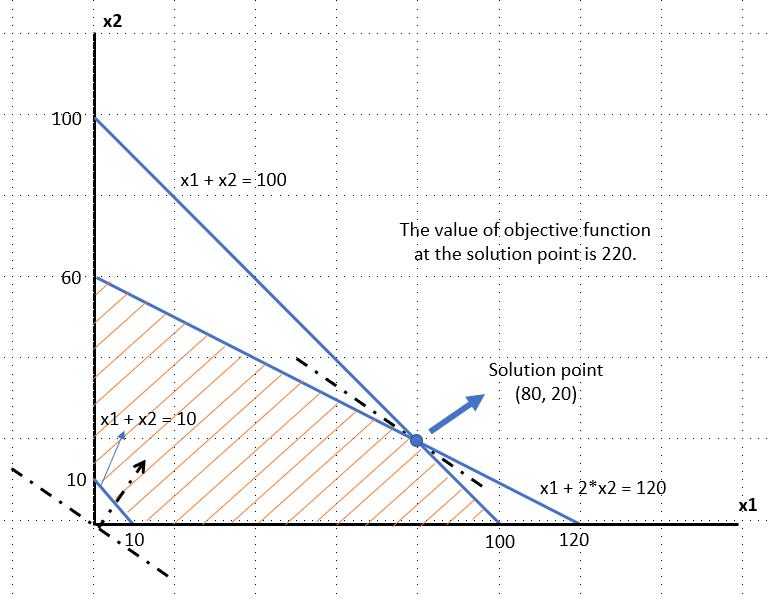

In [2]:
from IPython.display import Image

Image("q_4_1.png")

#### Q4.2
- Since this  is a 2 - variable LP, it can be solved graphically.
- Feasible region has been found as a bounded region. In order to maximize objective function we have used gradient of the objective: 2x1 + 3x2.
- The final point where an objective contour touches the feasible region is optimal. The corner points are as follows: (0,10), (10,0), (0,60), (80,20), (100,0). The optimal point which maximizes the objective function is: (80,20) because the objective function line leaves the bounded area at (80, 20) in gradient direction. Objective function value is: 220.


#### Q4.3
- With the addition of new constraint of x1+x2=100, feasible region reduced from an area to a line segment including corner points of (80,20) and (100,0). Since the optimal point (corner point) in the Q2 scenario is still included in this line segment, the optimal point and solution remained same as (80,20) and 220 respectively.

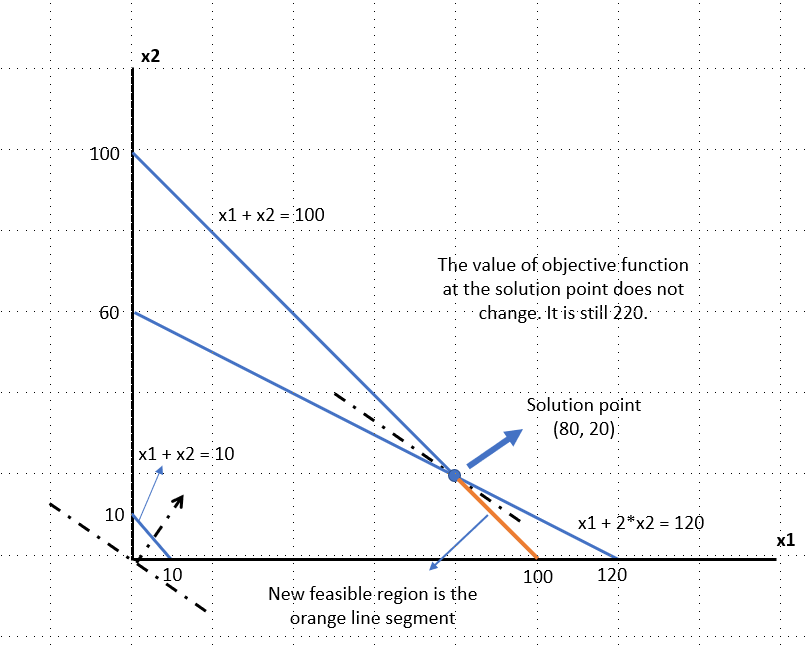

In [3]:
Image("q_4_3.png")